In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


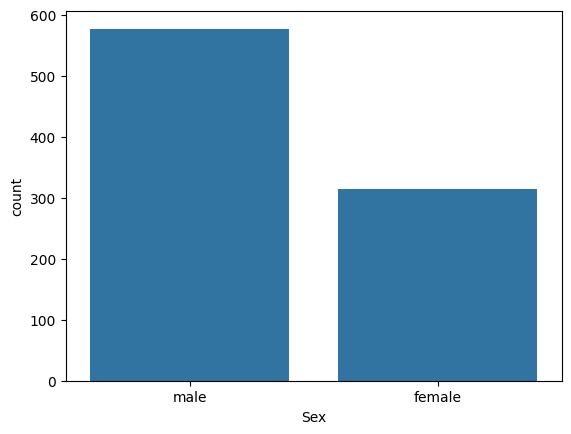

In [9]:
#Check the gender
sns.countplot(data, x=data.Sex)
plt.show()

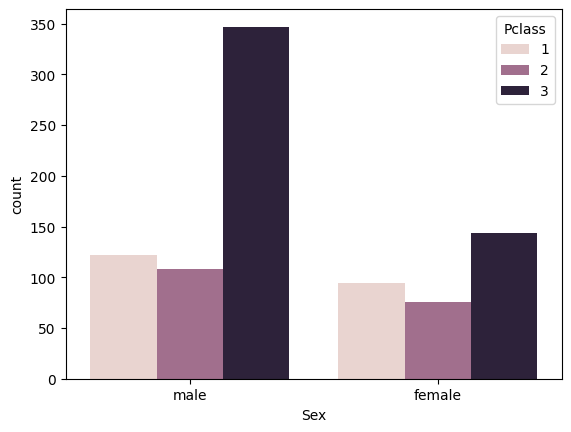

In [14]:
#Classes for genders
sns.countplot(data, x = data.Sex, hue=data.Pclass)
plt.show()

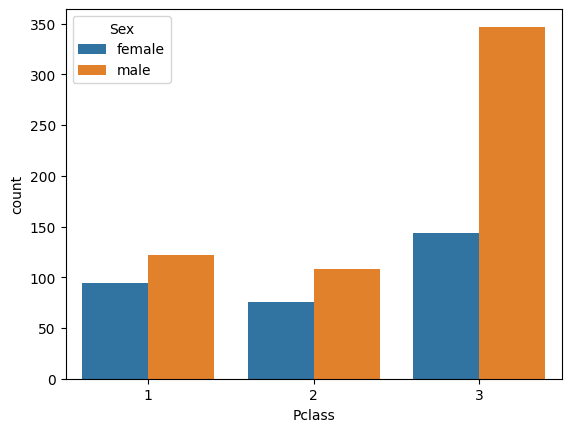

In [15]:
sns.countplot(data, x = data.Pclass, hue=data.Sex)
plt.show()

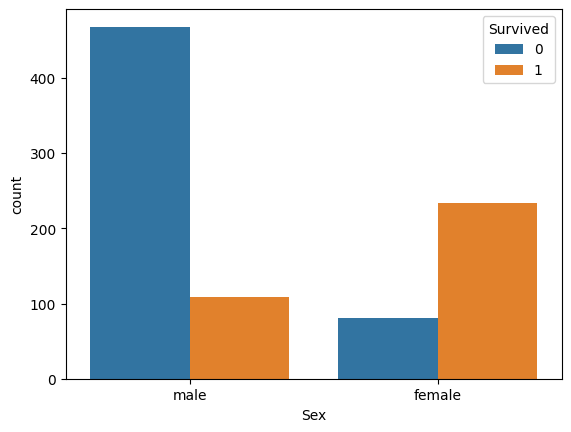

In [16]:
#Survived
sns.countplot(data, x = data.Sex, hue = data.Survived)
plt.show()

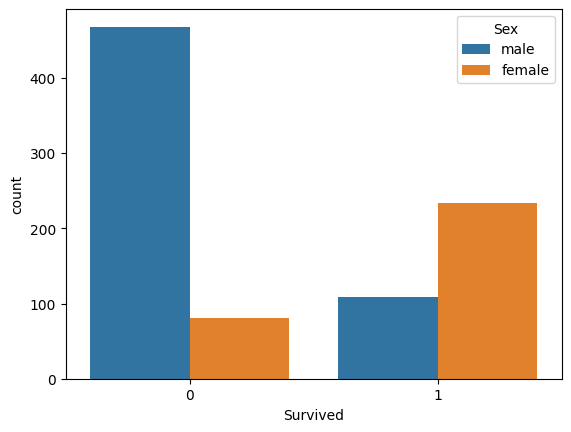

In [17]:
sns.countplot(data, x = data.Survived, hue = data.Sex)
plt.show()

In [21]:
#Add child factor
def add_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    
data['Person'] = data[['Age', 'Sex']].apply(add_child, axis=1)
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


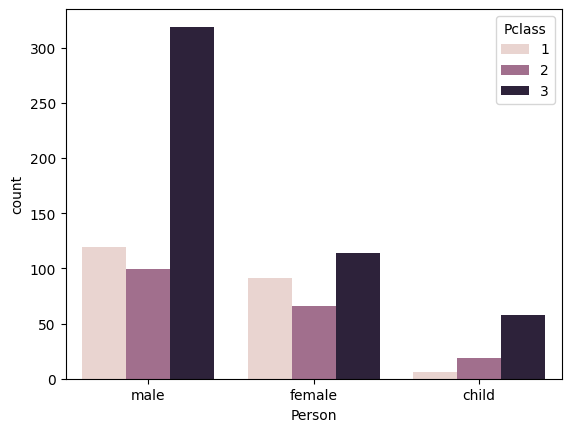

In [23]:
sns.countplot(data, x = data.Person, hue=data.Pclass)
plt.show()

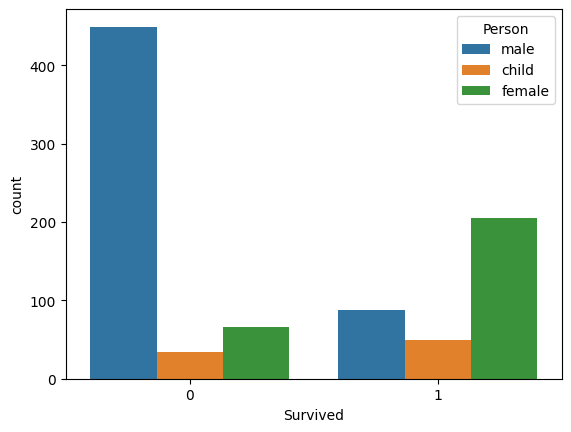

In [22]:
sns.countplot(data, x = data.Survived, hue = data.Person)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

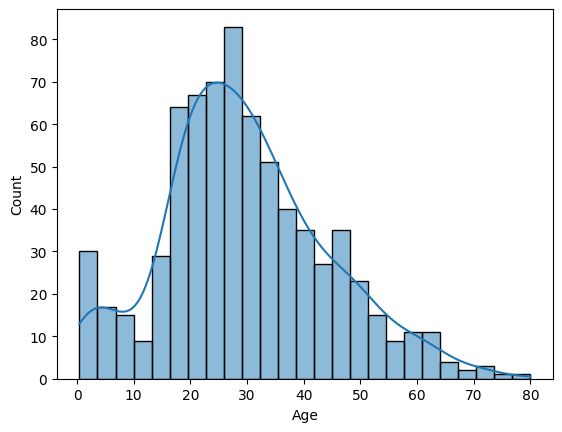

In [29]:
#Age distribution
sns.histplot(data.Age, bins=25, kde=True)

In [47]:
#Summary statistics
print(f'Max age: {data.Age.max()}')
print(f'Min age: {data.Age.min()}')
print(f'Mean age: {data.Age.mean()}')
print(f'Std age: {data.Age.std()}')
print(f"Male count: {(data.Person == 'male').sum()}")
print(f"Female count: {(data.Person == 'female').sum()}")
print(f"Child count: {(data.Person == 'child').sum()}")

Max age: 80.0
Min age: 0.42
Mean age: 29.69911764705882
Std age: 14.526497332334042
Male count: 537
Female count: 271
Child count: 83


/opt/anaconda3/envs/DataScienceUpdated/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/DataScienceUpdated/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


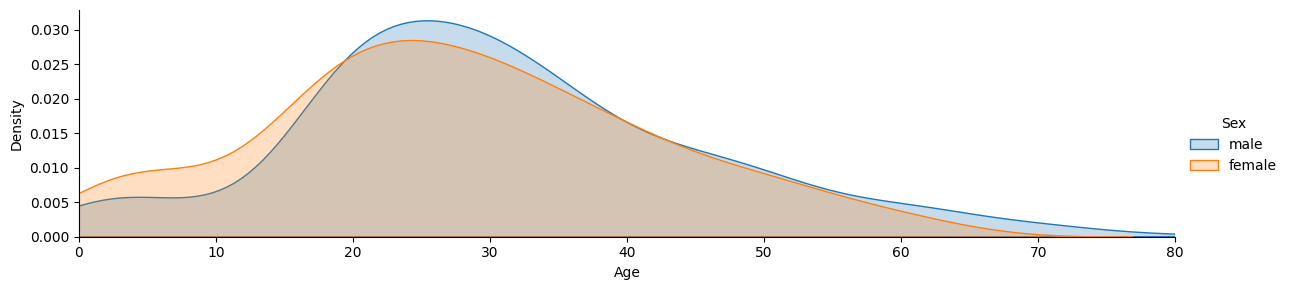

In [53]:
#Facegrid

fig = sns.FacetGrid(data, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = data['Age'].max()
youngest = data['Age'].min()

fig.set(xlim=(0, oldest))
fig.add_legend()

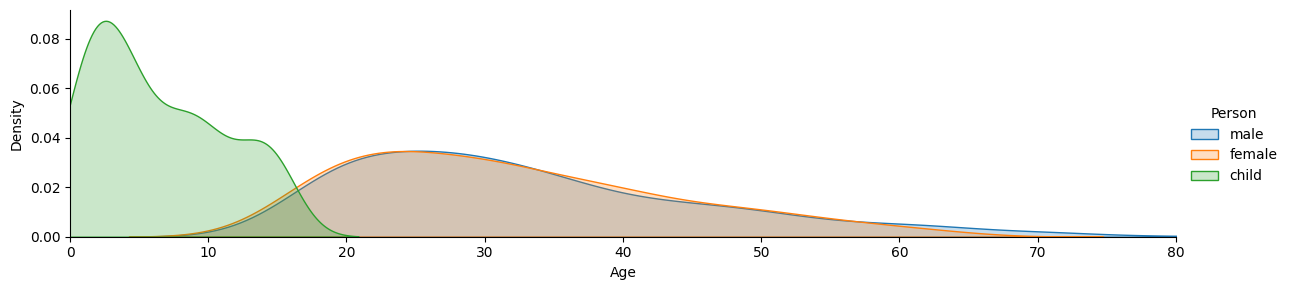

In [57]:
fig = sns.FacetGrid(data, hue = 'Person', aspect=4)

fig.map(sns.kdeplot, 'Age', fill = True)
fig.set(xlim=(0, oldest))
fig.add_legend()

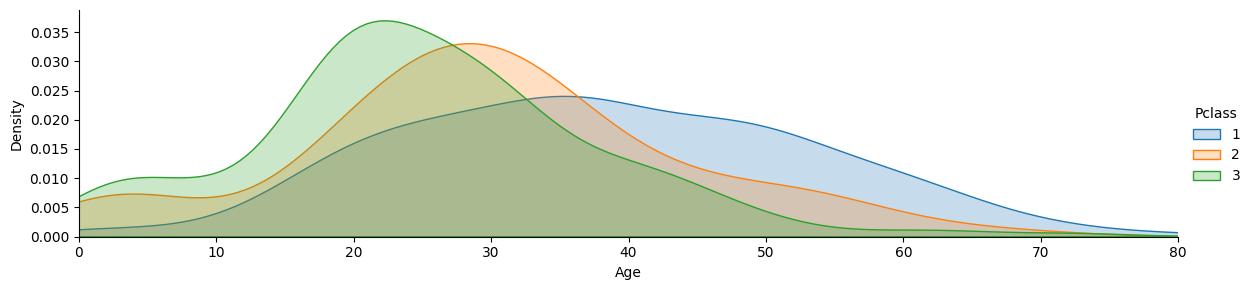

In [56]:
fig = sns.FacetGrid(data, hue = 'Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', fill = True)
fig.set(xlim=(0, oldest))
fig.add_legend()

In [58]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='Survived', ylabel='count'>

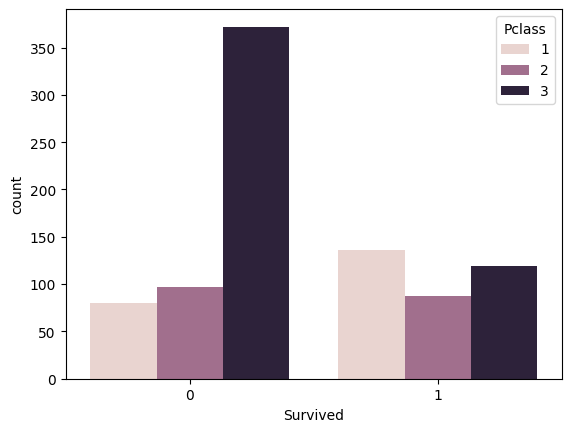

In [59]:
sns.countplot(data, x=data.Survived, hue = data.Pclass)